Explain what happens when you apply morphological dilation, erosion, opening, and closing operations using at least three kinds of structuring elements on your favorite binary image.

** You can use OpenCV's built -in functions.

** Using Latex for generating PDF is mandatory


In [1]:
#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

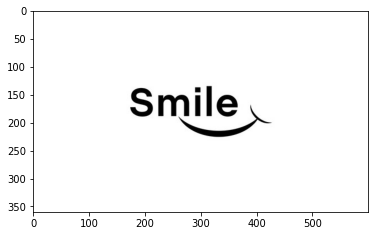

In [2]:
img = cv2.imread('smile.jpg')
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

In [3]:
ret, binary_img = cv2.threshold(img, 127, 255, type=cv2.THRESH_BINARY_INV)

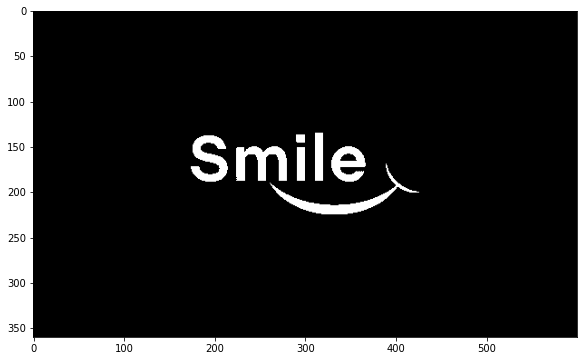

In [4]:
plt.figure(figsize=(14, 6))
plt.imshow(binary_img, cmap='gray')
plt.show()

In [10]:
kernel = np.ones((3, 3))
kernel

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [11]:
gaussian_blurr = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
gaussian_blurr

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [81]:
morph_rect = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5, 5))
print(morph_rect)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


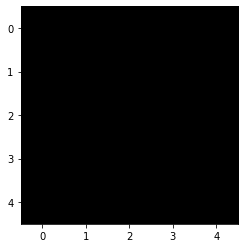

In [82]:
plt.imshow(morph_rect, cmap='gray')

In [75]:
morph_ellipse = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(5, 5))
print(morph_ellipse)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


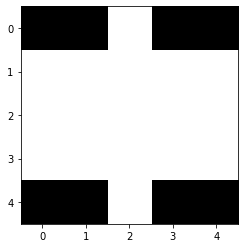

In [78]:
plt.imshow(morph_ellipse, cmap='gray')

In [72]:
morph_cross = cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(5, 5))
print(morph_cross)

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

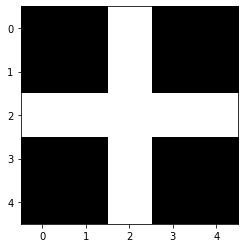

In [77]:
plt.imshow(morph_cross, cmap='gray')

## Dilation

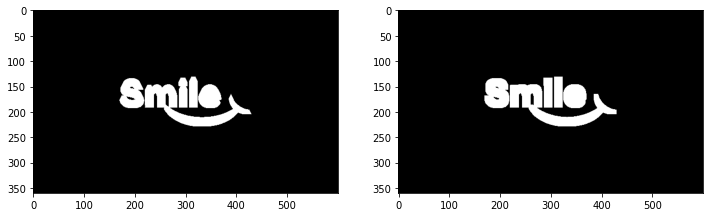

In [57]:
iterations = 4
dilation_img = cv2.dilate(binary_img, kernel=new_kar, iterations=iterations)
dilation_img2 = cv2.dilate(binary_img, kernel=kernel, iterations=iterations)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(dilation_img)
ax[1].imshow(dilation_img2)

In [89]:
iterations = 2
dilation_img = cv2.dilate(binary_img, kernel=morph_rect, iterations=iterations)

In [93]:
iterations = 2
dilation_img = cv2.dilate(binary_img, kernel=morph_ellipse, iterations=iterations)

In [97]:
iterations = 1
dilation_img = cv2.dilate(binary_img, kernel=morph_cross, iterations=iterations)

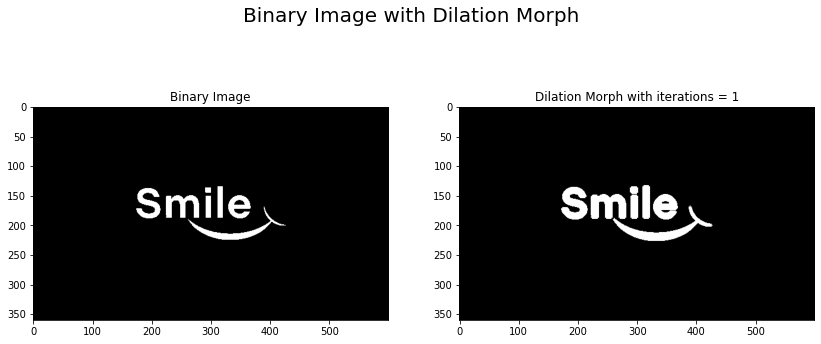

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].imshow(binary_img)
ax[0].set_title('Binary Image')

ax[1].imshow(dilation_img)
ax[1].set_title('Dilation Morph with iterations = ' +str(iterations) )

plt.suptitle('Binary Image with Dilation Morph', fontsize=20)
plt.show()

## Erosion

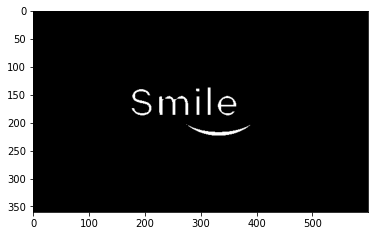

In [109]:
iterations = 1
erosion_img = cv2.erode(binary_img, kernel=morph_rect, iterations=iterations)
plt.imshow(erosion_img)

In [112]:
iterations = 1
erosion_img = cv2.erode(binary_img, kernel=morph_cross, iterations=iterations)

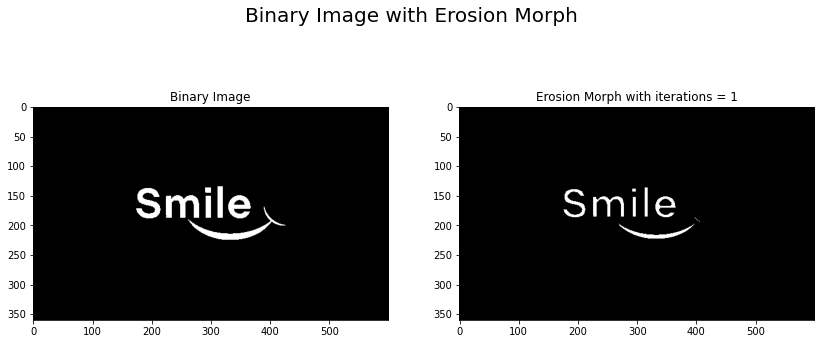

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].imshow(binary_img)
ax[0].set_title('Binary Image')

ax[1].imshow(erosion_img)
ax[1].set_title('Erosion Morph with iterations = ' +str(iterations) )

plt.suptitle('Binary Image with Erosion Morph', fontsize=20)
plt.show()

## Opening

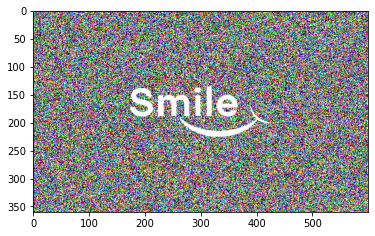

In [158]:
white_noise = (np.random.randint(low=0, high=2, size=binary_img.shape) * 255).astype('uint8')
binary_with_noise_img = binary_img + white_noise
plt.imshow(binary_with_noise_img)

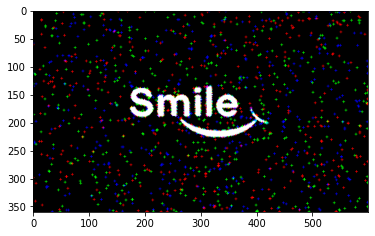

In [161]:
opening_img = cv2.morphologyEx(binary_with_noise_img, cv2.MORPH_OPEN, morph_cross)
plt.imshow(opening_img)

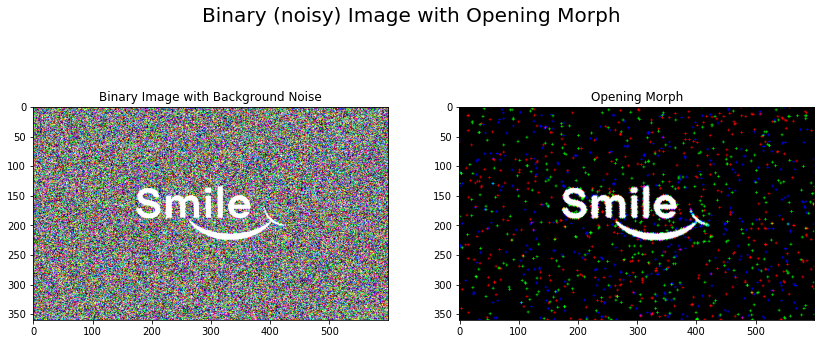

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].imshow(binary_with_noise_img)
ax[0].set_title('Binary Image with Background Noise')

ax[1].imshow(opening_img)
ax[1].set_title('Opening Morph')

plt.suptitle('Binary (noisy) Image with Opening Morph', fontsize=20)
plt.show()

In [122]:
binary_with_noise_img.min()

0

In [124]:
binary_with_noise_img.dtype

dtype('int64')

## Clossing

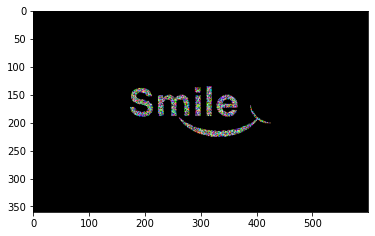

In [149]:
black_noise = (np.random.randint(low=0, high=2, size=binary_img.shape))
black_noise = black_noise * -255
black_noise_img = binary_img + black_noise
black_noise_img[black_noise_img == -255] = 0
black_noise_img = black_noise_img.astype('uint8')
plt.imshow(black_noise_img)

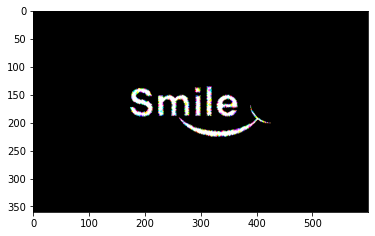

In [156]:
clossing_img = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, morph_cross)
plt.imshow(clossing_img)

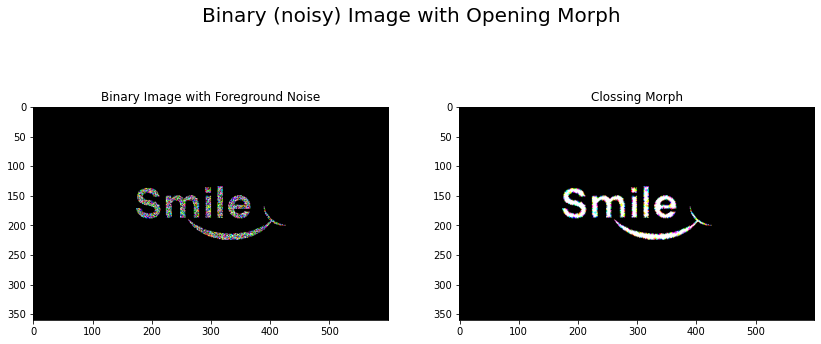

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].imshow(black_noise_img)
ax[0].set_title('Binary Image with Foreground Noise')

ax[1].imshow(clossing_img)
ax[1].set_title('Clossing Morph')

plt.suptitle('Binary (noisy) Image with Opening Morph', fontsize=20)
plt.show()